# Handling Missing Data

## Complete Case Analysis

This just means we'll remove the rows which have missing data!!

That is not always the best option and there are things to keep in mind before applying it...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [8]:
# percentage missing values in columns
df.isnull().mean()*100
# since the true/ false are treated as 0/1 taking mean will give us the percentage of 1's

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

There is scope to apply CCA here...
- Gender, Major_discipline, Company_size, Company_type are not possible because more than 5% data is missing
- city_development_index, enrolled_university, education_level, experience, training_hours CCA is possible

In [11]:
df.shape

(19158, 13)

In [15]:
# get a list of columns where the missing data is less than 5%
# make sure to exclude the columns with 0% data missing
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [17]:
df[cols].sample(5)
# these are the columns where we can use Complete Case Analysis

,city_development_index,enrolled_university,education_level,experience,training_hours
678,0.910,no_enrollment,Graduate,7.0,22.0
10959,0.624,no_enrollment,Graduate,12.0,330.0
18651,0.920,Part time course,Graduate,2.0,45.0
5039,0.910,no_enrollment,High School,3.0,147.0
17271,0.698,Full time course,Graduate,5.0,136.0


In [20]:
# check how much data will be left after removal
len(df[cols].dropna())/ len(df[cols])
# divide the lenght after dropiing null values by the initial value
# this is good enough

0.8968577095730244

In [22]:
new_df = df[cols].dropna()
df[cols].shape, new_df.shape

((19158, 5), (17182, 5))

### Numerical Columns

<Axes: >

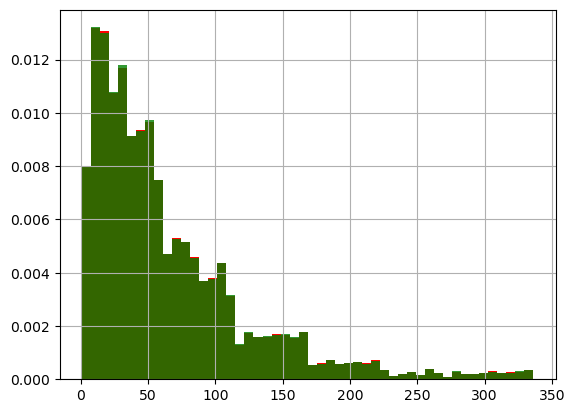

In [41]:
# we can check graphically if the dropping caused issues
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca
new_df['training_hours'].hist(bins=50, ax=ax, density=True, color='green', alpha=0.8)
# alpha is transperancy

We can note that there is an almost perfect overlap, meaning not much data was lost.

<Axes: ylabel='Density'>

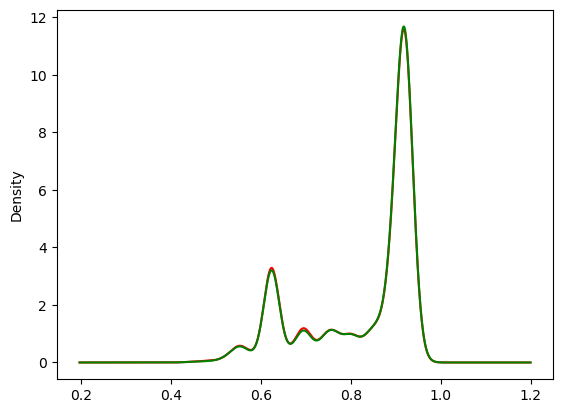

In [42]:
# we can do this with PDF as well
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

Notice that the lines overlap each other entirely...(almost)

<Axes: >

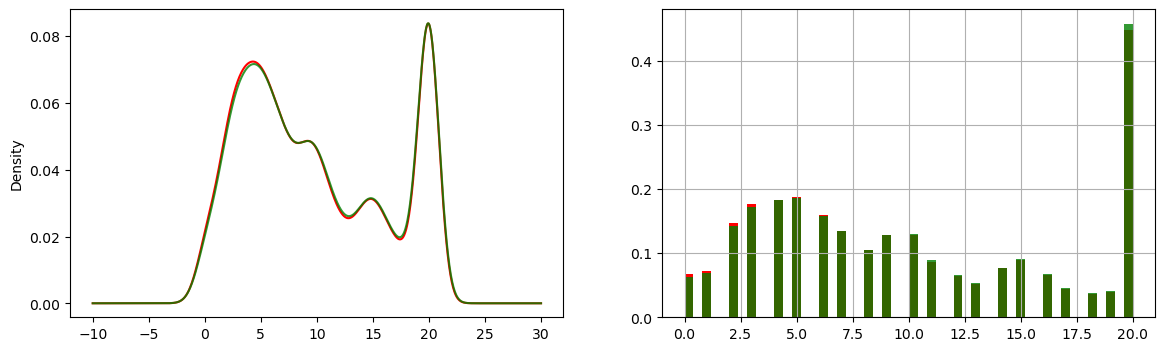

In [44]:
# doing the same with 'experience' column
fig = plt.figure(figsize=(14,4))

ax = fig.add_subplot(121)
# original data
df['experience'].plot.density(color='red', ax=ax)
# data after cca
new_df['experience'].plot.density(color='green', ax=ax, alpha=0.8)
# alpha is transperency

ax1 = fig.add_subplot(122)
# original data
df['experience'].hist(color='red', ax=ax1, bins=50, density=True)
# data after cca
new_df['experience'].hist(color='green', ax=ax1, bins=50, density=True, alpha=0.8)
# alpha is transperency

### Categorical Columns

In [46]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [48]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

What we are aiming for is not to alter the ratio of categories after CCA...

In [51]:
temp = pd.concat([
    # percentage of observations per category, original data
    df['enrolled_university'].value_counts()/ len(df),

    # percentage of observations per category, after cca
    new_df['enrolled_university'].value_counts()/ len(new_df)
], axis=1)

temp.columns = ['original', 'CCA']

temp

,original,CCA
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [52]:
temp = pd.concat([
    # percentage of observations per category, original data
    df['education_level'].value_counts()/ len(df),

    # percentage of observations per category, after cca
    new_df['education_level'].value_counts()/ len(new_df)
], axis=1)

temp.columns = ['original', 'CCA']

temp

,original,CCA
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


Note that there is no drastic change in the ratios.